In [1]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import numpy as np
import os

### GEOG469 Northwest Justice Project
#### Census 2000 Exploratory Data Analysis Section

In [2]:
## Read data using pandas
census2000_raw = pd.read_csv("C:/Users/LXB19/Documents/NWJ2019/census00_ready.csv").copy()

In [3]:
## Show some information about the top 3 rows
census2000_raw.head(3)

,GEO.id,GEO.id2,GEO.display-label,TotalPop,MalePop,FemalePop,TotalHousingUnit00,PercentTotalUnits,MedianRoomUnits,OccuHousingUnit,...,IncomeBtw35000)39999,IncomeBtw40K_49999,IncomeBtw45000_49999,IncomeBtw50K_59999,IncomeBtw60k_74999,IncomeBtw75000_99999,Income100K_124999,Income125000_149999,IncomeBtwe150k_199999,IncomeMore200K
0,NaN,NaN,NaN,Population,Male,Female,Number; Total housing units,Percent; Total housing units,Number; Total housing units - ROOMS - Median (...,Number; Occupied Housing Units,...,"$35,000 to $39,999","$40,000 to $44,999","$45,000 to $49,999","$50,000 to $59,999","$60,000 to $74,999","$75,000 to $99,999","$100,000 to $124,999","$125,000 to $149,999","$150,000 to $199,999","$200,000 or more"
1,1500000US530019501001,5.300000e+11,"Block Group 1, Census Tract 9501, Adams County...",773,411,362,264,100,6.7,239,...,8,26,30,26,19,18,10,5,0,6
2,1500000US530019501002,5.300000e+11,"Block Group 2, Census Tract 9501, Adams County...",503,256,247,255,100,5.7,227,...,13,9,9,28,19,17,4,0,6,0


In [4]:
## Cleaning: 1) We do not need GEO.id2 because it's the same for all rows, and we do not need 
## the first row because it is for meta data
census2000_raw2 = census2000_raw.drop('GEO.id2', axis = 1)

In [5]:
census2000_raw2 = census2000_raw2.drop(0, axis = 0)

In [6]:
## Show some information abotu the top 3 rows from the cleaned datasets
census2000_raw2.head(3)

,GEO.id,GEO.display-label,TotalPop,MalePop,FemalePop,TotalHousingUnit00,PercentTotalUnits,MedianRoomUnits,OccuHousingUnit,PercentOccuHousingUnit,...,IncomeBtw35000)39999,IncomeBtw40K_49999,IncomeBtw45000_49999,IncomeBtw50K_59999,IncomeBtw60k_74999,IncomeBtw75000_99999,Income100K_124999,Income125000_149999,IncomeBtwe150k_199999,IncomeMore200K
1,1500000US530019501001,"Block Group 1, Census Tract 9501, Adams County...",773,411,362,264,100,6.7,239,100,...,8,26,30,26,19,18,10,5,0,6
2,1500000US530019501002,"Block Group 2, Census Tract 9501, Adams County...",503,256,247,255,100,5.7,227,100,...,13,9,9,28,19,17,4,0,6,0
3,1500000US530019501003,"Block Group 3, Census Tract 9501, Adams County...",604,289,315,325,100,4.5,273,100,...,17,29,14,21,13,14,0,0,4,2


In [7]:
census2000_raw2.shape

(4825, 96)

In [16]:
GeoID=[]
for item in census2000_raw2['GEO.id']:
    temp = item[9:20]
    GeoID.append(temp)

In [17]:
census2000_raw2.drop('GEO.id', axis = 1, inplace = True)

In [19]:
census2000_raw2['GeoID'] = GeoID

In [26]:
## Dealing with null values using the Imputer method
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy="median")

D:\anaconda3\envs\Python3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [30]:
## Drop the first two columns which surely contains String
census2000_onlyNum = census2000_raw2.drop(['GeoID', 'GEO.display-label'], axis=1)

In [31]:
## Tested the dataset, and realize it contains a string called '(X)', so use the replace method to replace it with nan
census2000_onlyNum.replace('(X)', np.nan, inplace=True)

In [32]:
## fit the imputer instance to the datasets
imputer.fit(census2000_onlyNum)

Imputer(axis=0, copy=True, missing_values='NaN', strategy='median', verbose=0)

In [33]:
## The imputer has simply computed the median of each attribute and stored the 
## result in its statistics_ instance variable.
imputer.statistics_

array([1.080e+03, 5.360e+02, 5.460e+02, 4.490e+02, 1.000e+02, 5.600e+00,
       4.210e+02, 1.000e+02, 0.000e+00, 0.000e+00, 9.000e+00, 5.000e+00,
       3.700e+01, 2.190e+01, 3.600e+01, 1.910e+01, 2.700e+01, 1.470e+01,
       6.000e+00, 2.700e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.602e+05, 1.580e+02, 7.450e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 8.000e+00, 3.500e+00, 2.600e+01, 1.320e+01, 5.200e+01,
       2.560e+01, 2.400e+01, 1.220e+01, 8.000e+00, 4.000e+00, 1.215e+03,
       5.100e+01, 2.550e+01, 3.260e+02, 1.000e+02, 1.000e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 9.600e+00, 3.000e+01,
       3.090e+01, 1.700e+01, 1.720e+01, 8.000e+00, 7.100e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 6.910e+02, 1.600e+01, 1.470e+01,
       1.400e+01, 1.330e+01, 1.300e+01, 1.210e+01, 1.000e+01, 9.700e+00,
       8.000e+00, 6.300e+00, 2.700e+01, 2.790e+01, 6.000e+00, 3.100e+00,
       2.300e+01, 1.900e+01, 2.000e+01, 2.200e+01, 

In [34]:
## Check the median value
census2000_onlyNum.median().values

array([1.080e+03, 5.360e+02, 5.460e+02, 4.490e+02, 1.000e+02, 5.600e+00,
       4.210e+02, 1.000e+02, 0.000e+00, 0.000e+00, 9.000e+00, 5.000e+00,
       3.700e+01, 2.190e+01, 3.600e+01, 1.910e+01, 2.700e+01, 1.470e+01,
       6.000e+00, 2.700e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       1.602e+05, 1.580e+02, 7.450e+01, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 8.000e+00, 3.500e+00, 2.600e+01, 1.320e+01, 5.200e+01,
       2.560e+01, 2.400e+01, 1.220e+01, 8.000e+00, 4.000e+00, 1.215e+03,
       5.100e+01, 2.550e+01, 3.260e+02, 1.000e+02, 1.000e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 9.600e+00, 3.000e+01,
       3.090e+01, 1.700e+01, 1.720e+01, 8.000e+00, 7.100e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 6.910e+02, 1.600e+01, 1.470e+01,
       1.400e+01, 1.330e+01, 1.300e+01, 1.210e+01, 1.000e+01, 9.700e+00,
       8.000e+00, 6.300e+00, 2.700e+01, 2.790e+01, 6.000e+00, 3.100e+00,
       2.300e+01, 1.900e+01, 2.000e+01, 2.200e+01, 

In [35]:
census2000_onlyNum.head()

,TotalPop,MalePop,FemalePop,TotalHousingUnit00,PercentTotalUnits,MedianRoomUnits,OccuHousingUnit,PercentOccuHousingUnit,HUnitsLessThan50K,HPercentLessThan50K,...,IncomeBtw35000)39999,IncomeBtw40K_49999,IncomeBtw45000_49999,IncomeBtw50K_59999,IncomeBtw60k_74999,IncomeBtw75000_99999,Income100K_124999,Income125000_149999,IncomeBtwe150k_199999,IncomeMore200K
1,773,411,362,264,100,6.7,239,100,0,0,...,8,26,30,26,19,18,10,5,0,6
2,503,256,247,255,100,5.7,227,100,13,9.4,...,13,9,9,28,19,17,4,0,6,0
3,604,289,315,325,100,4.5,273,100,62,43.4,...,17,29,14,21,13,14,0,0,4,2
4,667,312,355,305,100,6.2,290,100,11,5,...,38,27,15,28,18,23,7,5,0,2
5,558,283,275,279,100,5.8,229,100,20,28.2,...,18,22,21,21,19,26,2,4,2,0


In [36]:
## loading the imputer instance to a np array
X = imputer.transform(census2000_onlyNum)

In [37]:
## Transform it into a dataframe
census2000 = pd.DataFrame(X, columns=census2000_onlyNum.columns)

In [51]:
## Adding the blockID back
census2000['GeoID'] = census2000_raw2.GeoID

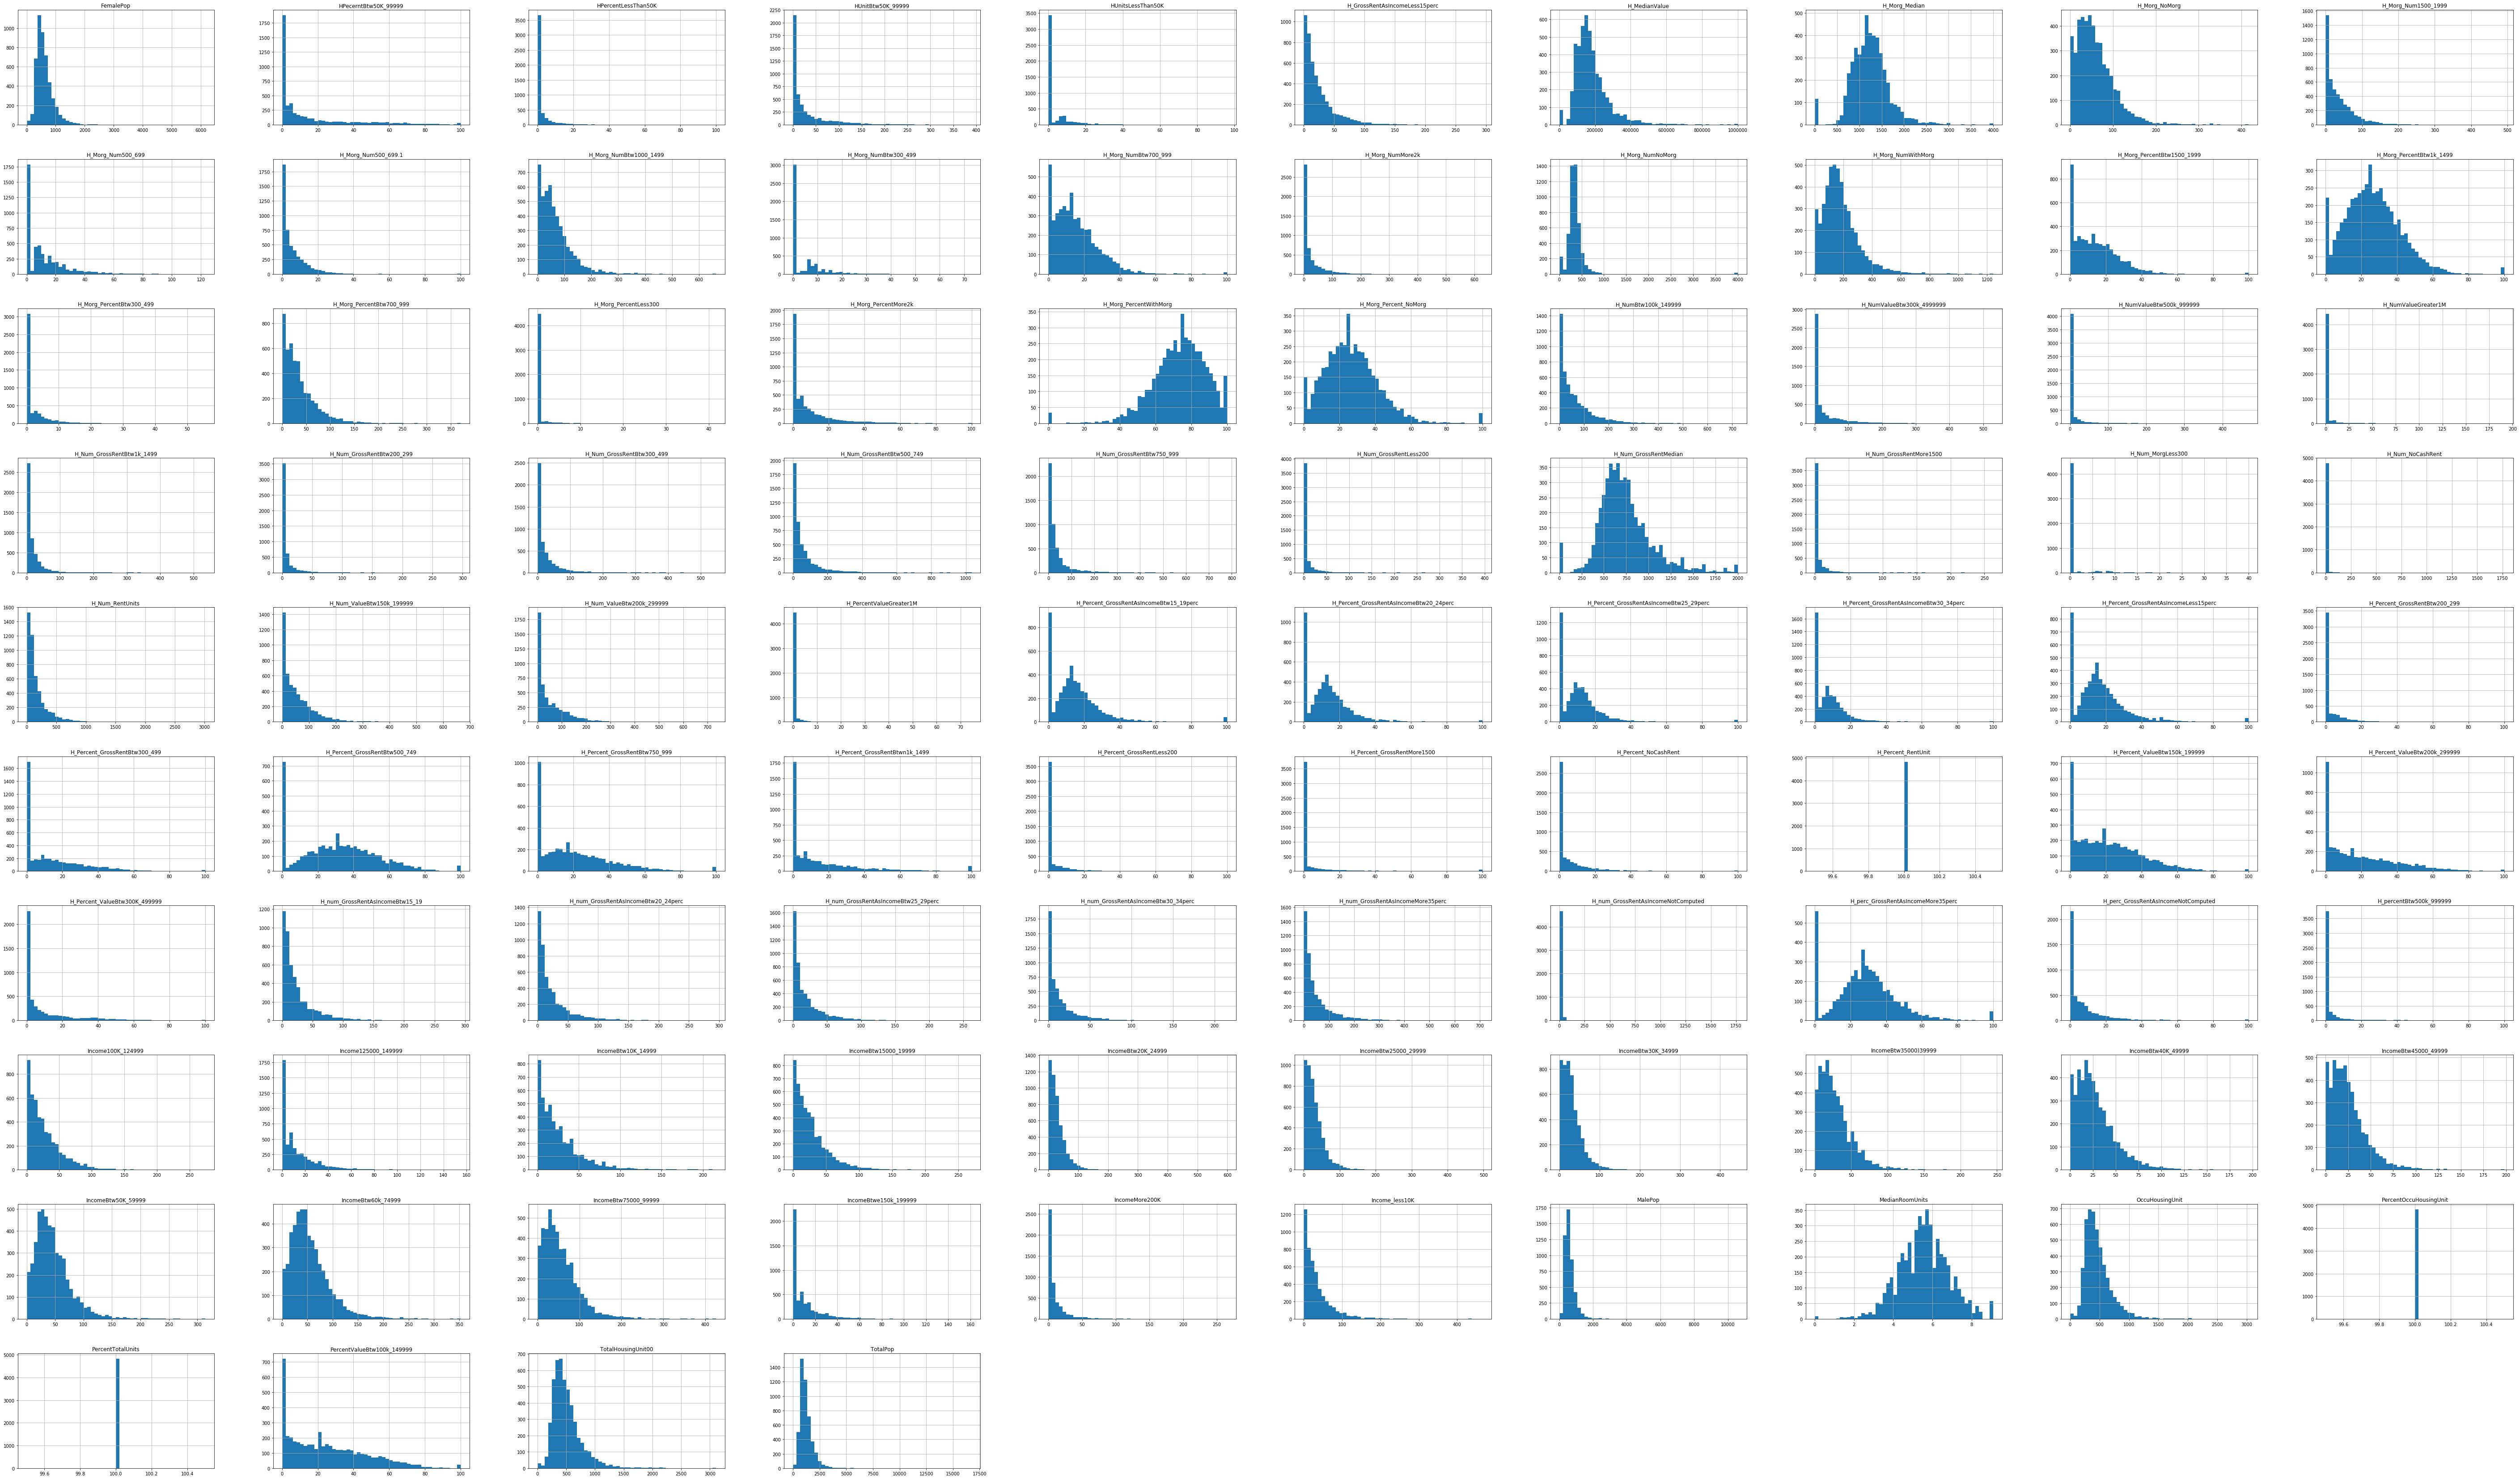

In [52]:
## Exploring distribution among all columns

census2000.hist(bins=50, figsize=(100,60))
plt.show()

In [39]:
correlation_matrix = census2000.corr()

In [41]:
## print all correlations
correlation_matrix
## also can target one column 
## correlation_matrix[TotalPop]

,TotalPop,MalePop,FemalePop,TotalHousingUnit00,PercentTotalUnits,MedianRoomUnits,OccuHousingUnit,PercentOccuHousingUnit,HUnitsLessThan50K,HPercentLessThan50K,...,IncomeBtw35000)39999,IncomeBtw40K_49999,IncomeBtw45000_49999,IncomeBtw50K_59999,IncomeBtw60k_74999,IncomeBtw75000_99999,Income100K_124999,Income125000_149999,IncomeBtwe150k_199999,IncomeMore200K
TotalPop,1.000000,0.982869,0.979246,0.833267,NaN,-0.020906,0.875327,NaN,0.081856,-0.049715,...,0.586844,0.587761,0.585340,0.650986,0.640803,0.559879,0.394949,0.286959,0.222287,0.145379
MalePop,0.982869,1.000000,0.925115,0.780868,NaN,-0.024390,0.818807,NaN,0.080701,-0.037988,...,0.556473,0.548691,0.551331,0.604192,0.592295,0.515003,0.362440,0.262763,0.204430,0.133079
FemalePop,0.979246,0.925115,1.000000,0.857896,NaN,-0.016246,0.902824,NaN,0.079885,-0.060643,...,0.597007,0.607454,0.599563,0.676670,0.668774,0.587060,0.415061,0.302205,0.233122,0.153150
TotalHousingUnit00,0.833267,0.780868,0.857896,1.000000,NaN,-0.239696,0.967654,NaN,0.068561,-0.043972,...,0.658931,0.652016,0.626717,0.665435,0.609364,0.500970,0.340037,0.256268,0.210481,0.159383
PercentTotalUnits,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MedianRoomUnits,-0.020906,-0.024390,-0.016246,-0.239696,NaN,1.000000,-0.191793,NaN,-0.092340,-0.159945,...,-0.285002,-0.202498,-0.130039,-0.021971,0.161058,0.350565,0.431254,0.401428,0.389443,0.360704
OccuHousingUnit,0.875327,0.818807,0.902824,0.967654,NaN,-0.191793,1.000000,NaN,0.036924,-0.082399,...,0.670705,0.667899,0.647509,0.698957,0.658308,0.557047,0.387372,0.292653,0.236885,0.174541
PercentOccuHousingUnit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HUnitsLessThan50K,0.081856,0.080701,0.079885,0.068561,NaN,-0.092340,0.036924,NaN,1.000000,0.768707,...,0.052941,0.047929,0.021083,-0.018407,-0.083312,-0.138889,-0.149834,-0.112271,-0.122556,-0.089111
HPercentLessThan50K,-0.049715,-0.037988,-0.060643,-0.043972,NaN,-0.159945,-0.082399,NaN,0.768707,1.000000,...,-0.027726,-0.041016,-0.062164,-0.123019,-0.186316,-0.223510,-0.206529,-0.164906,-0.149537,-0.111087


### Handling shapefile

In [42]:
## Read census 2000 block group level shapefile
census00_shp = gpd.read_file('C:/Users/LXB19/Documents/NWJ2019/WA_blk_census00/bg00.shp')

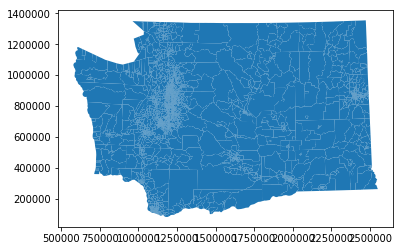

In [43]:
## Plot the shapefile
census00_shp.plot()

In [44]:
## read the watershed shapefile
waterbody = gpd.read_file('C:/Users/LXB19/Documents/NWJ2019/WA_waterbodies/WA_WaterBody.shp')

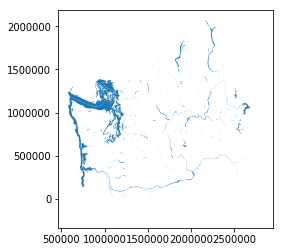

In [47]:
## plot the watershed shapefile
waterbody.plot()

In [48]:
## checking if the two shapefiles have the same coordinate system
print(census00_shp.crs)
print(waterbody.crs)

{'init': 'epsg:2927'}
{'init': 'epsg:2927'}
